In [7]:
import pandas as pd
df = pd.read_csv('Clean_Dataset.csv')

In [8]:
df.airline.value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [9]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [10]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [11]:
df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [12]:
df.arrival_time.value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [13]:
df.stops.value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [14]:
df['class'].value_counts()

class
Economy     206666
Business     93487
Name: count, dtype: int64

In [15]:
df['duration'].min()

np.float64(0.83)

In [16]:
df['duration'].max()

np.float64(49.83)

In [17]:
df['duration'].median()

np.float64(11.25)

##Preprocessing

In [18]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('flight', axis=1)

df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [19]:
df.stops = pd.factorize(df.stops)[0]

In [20]:
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)

In [21]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


##Training Regression Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

x, y = df.drop('price', axis=1), df.price

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [24]:
reg = RandomForestRegressor(n_jobs=-1)

reg.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [25]:
reg.score(x_test, y_test)

0.9854281122059995

In [26]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9854281122059995
MAE: 1070.0951774778136
MSE: 7555378.049693796
RMSE: 2748.704794934115


Text(0.5, 1.0, 'Prediction VS Actual Price In Rupees')

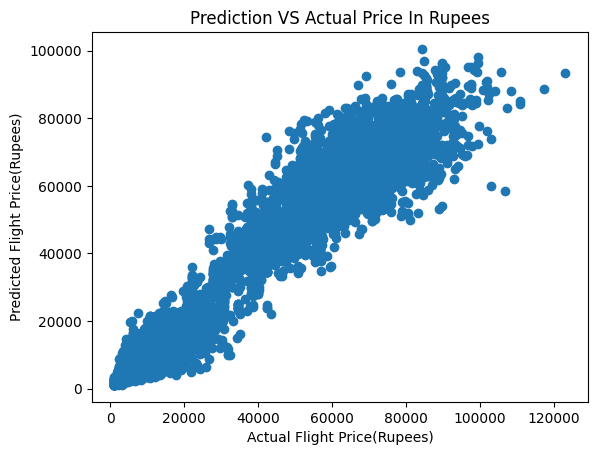

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')

In [28]:
df.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

In [29]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

<BarContainer object of 10 artists>

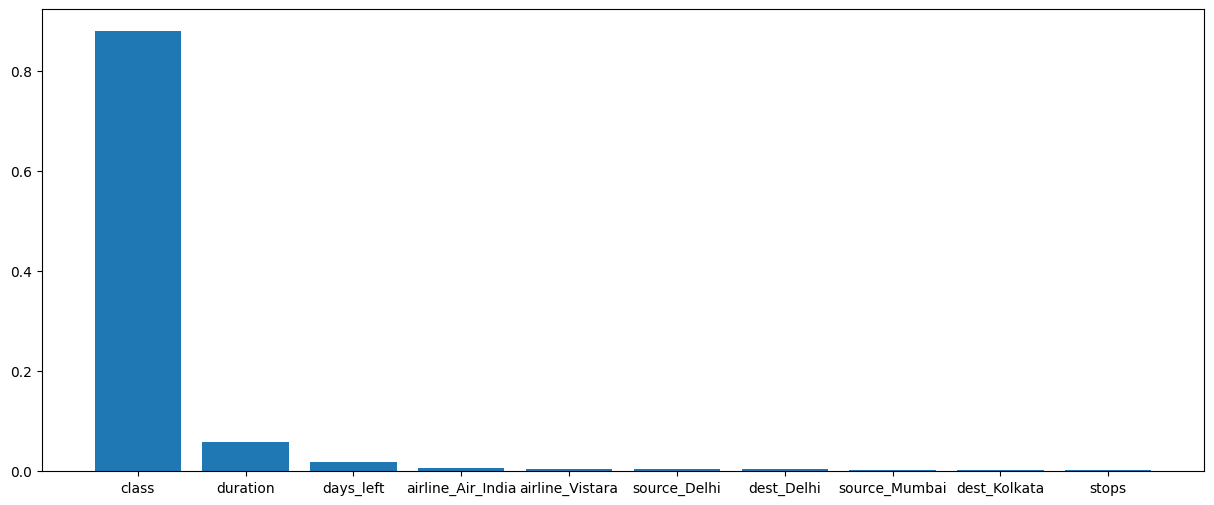

In [30]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])




In [42]:
from sklearn.model_selection import GridSearchCV

#Param1: A, B, B
#Param 2: X, Y, Z
#AX, AY, AZ, BX,....

reg = RandomForestRegressor(n_job=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_lead': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

TypeError: RandomForestRegressor.__init__() got an unexpected keyword argument 'n_job'

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100,300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0, 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, 
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-2)
random_search.fit(x_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=213; total time=   0.0s
[CV] END max_depth=30, max_features=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=257; total time=  44.5s


In [36]:
best_regressor.score(x_test, y_test)

0.9863153950660549

In [40]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_regressor.predict(x_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9862813624518345
MAE: 1087.0019708215646
MSE: 7112976.33281175
RMSE: 2667.0163728053394


Text(0.5, 1.0, 'Prediction VS Actual Price In Rupees')

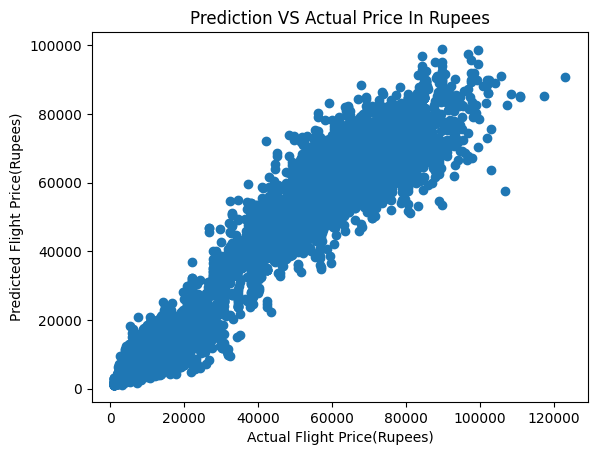

In [41]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction VS Actual Price')